In [1]:
!pip install pycaret --ignore-installed llvmlite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.8/793.8 kB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.6 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done

In [2]:
import pycaret

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [4]:
import time
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import logging
from warnings import simplefilter

In [5]:
import pandas as pd

train_data = pd.read_csv('../input/spaceship-titanic/train.csv')
test_data = pd.read_csv('../input/spaceship-titanic/test.csv')

print('Train: ', train_data.shape)
print('Test: ', test_data.shape)

Train:  (8693, 14)
Test:  (4277, 13)


In [6]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


<AxesSubplot:>

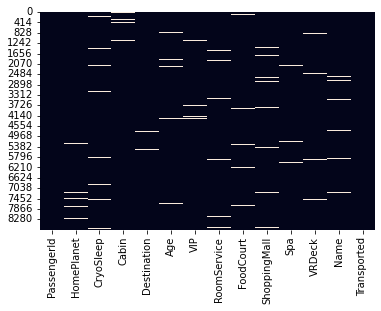

In [8]:
sns.heatmap(train_data.isnull(), cbar=False)

<AxesSubplot:>

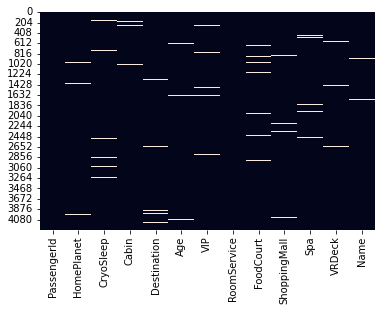

In [9]:
sns.heatmap(test_data.isnull(), cbar=False)

In [10]:
train_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [11]:
test_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [12]:
def cabin_split(dataframe):
    df = dataframe.copy()
    
    df['Cabin'] = df['Cabin'].astype(str)
    cabins = df['Cabin'].str.split('/', expand=True)
    cabins.columns = ['Cabin_deck', 'Cabin_num', 'Cabin_side']
    
    df = pd.concat([df, cabins], axis=1)
    df = df.drop(['Cabin'], axis=1)
    df['Cabin_deck'].astype(str)
    df['Cabin_num'] = pd.to_numeric(df['Cabin_num'], errors='coerce')
    df['Cabin_side'].astype(str)
    df['Cabin_side'] = df['Cabin_side'].map(lambda x: 'missing' if x is None else x)
    df['Cabin_deck'] = df['Cabin_deck'].replace('nan','missing')
    
    
    return df

train_data = cabin_split(train_data)
test_data = cabin_split(test_data)
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S


In [13]:
train_data['HomePlanet'].replace(np.nan,'missing',inplace=True)
train_data['CryoSleep'].replace(np.nan,'missing',inplace=True)
train_data['Destination'].replace(np.nan,'missing',inplace=True)
train_data['VIP'].replace(np.nan,'missing',inplace=True)

test_data['HomePlanet'].replace(np.nan,'missing',inplace=True)
test_data['CryoSleep'].replace(np.nan,'missing',inplace=True)
test_data['Destination'].replace(np.nan,'missing',inplace=True)
test_data['VIP'].replace(np.nan,'missing',inplace=True)

In [14]:
train_data['RoomService'].fillna(train_data['RoomService'].mean(),inplace=True)
train_data['FoodCourt'].fillna(train_data['FoodCourt'].mean(),inplace=True)
train_data['ShoppingMall'].fillna(train_data['ShoppingMall'].mean(),inplace=True)
train_data['Spa'].fillna(train_data['Spa'].mean(),inplace=True)
train_data['VRDeck'].fillna(train_data['VRDeck'].mean(),inplace=True)
train_data['Age'].replace(np.nan,24.0,inplace=True)

test_data['RoomService'].fillna(test_data['RoomService'].mean(),inplace=True)
test_data['FoodCourt'].fillna(test_data['FoodCourt'].mean(),inplace=True)
test_data['ShoppingMall'].fillna(test_data['ShoppingMall'].mean(),inplace=True)
test_data['Spa'].fillna(test_data['Spa'].mean(),inplace=True)
test_data['VRDeck'].fillna(test_data['VRDeck'].mean(),inplace=True)
test_data['Age'].replace(np.nan,24.0,inplace=True)

train_data['Cabin_side'] = train_data['Cabin_side'].replace({'P':'port','S':'starboard'})
test_data['Cabin_side'] = test_data['Cabin_side'].replace({'P':'port','S':'starboard'})

train_data['Cabin_num'].fillna(train_data['Cabin_num'].median(),inplace=True) 
test_data['Cabin_num'].fillna(test_data['Cabin_num'].median(),inplace=True)

In [15]:
train_data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,port
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,starboard
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,starboard
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,starboard
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,starboard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98.0,port
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499.0,starboard
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500.0,starboard
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608.0,starboard


In [16]:
train_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Cabin_deck        0
Cabin_num         0
Cabin_side        0
dtype: int64

In [17]:
test_data.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
Cabin_deck       0
Cabin_num        0
Cabin_side       0
dtype: int64

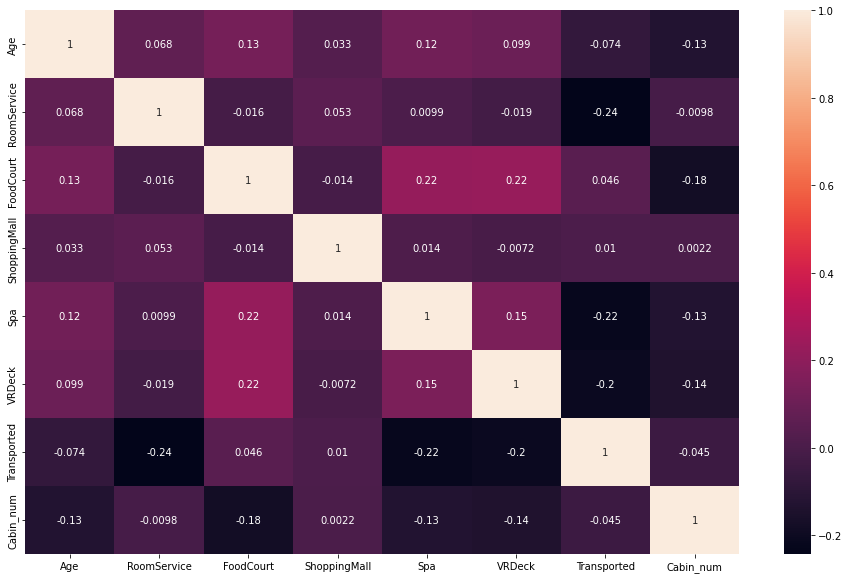

In [18]:
plt.figure(figsize = (16,10))
sns.heatmap(train_data.corr(), annot = True)
plt.show()

In [19]:
from pycaret.classification import *

clf = setup(train_data, target='Transported', train_size=0.8, session_id=10)

ImportError: Numba needs NumPy 1.20 or less

In [ ]:
models()

In [ ]:
lgbm = create_model('lightgbm')
tuned_lgbm = tune_model(lgbm, optimize='Accuracy')

In [ ]:
submission = pd.read_csv(r'../input/spaceship-titanic/sample_submission.csv')
submission.head()

In [ ]:
submission['Transported'] = tuned_lgbm
submission['Transported'] = submission['Transported'].replace({0:'False',1:'True'})
submission.to_csv('submission.csv',index=False)